In [ ]:
# 非定常環境における行動価値手法の比較
epsilon-greedy手法を用いて非定常環境における挙動の実験。  
真の報酬をランダムウォークで変動させて実験。  
行動を選択する際の報酬(reward)を標本平均と加重平均の場合で比較

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import reinforce_learning as rl

In [ ]:
## 定常環境における実験

100%|██████████| 1000/1000 [00:10<00:00, 98.01it/s]


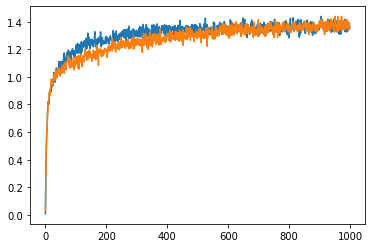

In [3]:
sm_client = rl.bandit.EpsilonGreedyClient(epsilon=0.1)
sm_client.run()

wa_client = rl.bandit.EpsilonGreedyClient(epsilon=0.1, alpha=0.1)
wa_client.run()

plt.plot(sm_client.rewards)
plt.plot(wa_client.rewards)

In [ ]:
## 非定常環境における実験

In [3]:
sm_client1 = rl.bandit.EpsilonGreedyClient(epsilon=0.1, bandit=rl.bandit.RandomWalkNArmBandit)
wa_client1 = rl.bandit.EpsilonGreedyClient(epsilon=0.1, bandit=rl.bandit.RandomWalkNArmBandit, alpha=0.1)

sm_client1.run()
wa_client1.run()

100%|██████████| 1000/1000 [00:18<00:00, 52.75it/s]


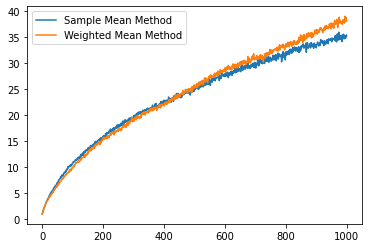

In [4]:
plt.plot(sm_client1.rewards, label="Sample Mean Method")
plt.plot(wa_client1.rewards, label="Weighted Mean Method")
plt.legend()

In [5]:
sm_client1 = rl.bandit.EpsilonGreedyClient(epsilon=0.1, bandit=rl.bandit.RandomWalkNArmBandit, std_dev0=0.1)
wa_client1 = rl.bandit.EpsilonGreedyClient(epsilon=0.1, bandit=rl.bandit.RandomWalkNArmBandit, std_dev0=0.1, alpha=0.1)

sm_client1.run()
wa_client1.run()

100%|██████████| 1000/1000 [00:19<00:00, 52.37it/s]


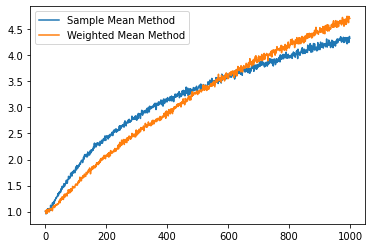

In [6]:
plt.plot(sm_client1.rewards, label="Sample Mean Method")
plt.plot(wa_client1.rewards, label="Weighted Mean Method")
plt.legend()

In [7]:
sm_client1 = rl.bandit.EpsilonGreedyClient(k=3000, epsilon=0.1, bandit=rl.bandit.RandomWalkNArmBandit, std_dev0=0.1)
wa_client1 = rl.bandit.EpsilonGreedyClient(k=3000, epsilon=0.1, bandit=rl.bandit.RandomWalkNArmBandit, std_dev0=0.1, alpha=0.1)

sm_client1.run()
wa_client1.run()

100%|██████████| 3000/3000 [00:57<00:00, 52.29it/s]


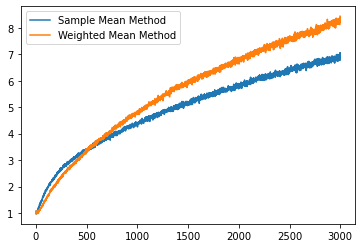

In [8]:
plt.plot(sm_client1.rewards, label="Sample Mean Method")
plt.plot(wa_client1.rewards, label="Weighted Mean Method")
plt.legend()

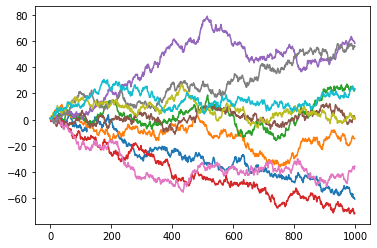

In [2]:
rw_bandit = rl.bandit.RandomWalkNArmBandit()
n_loop = 1000

rewards = np.zeros((n_loop, 10))

for i in range(n_loop):
    rewards[i] = rw_bandit.true_rewards
    rw_bandit.update_rewards()

for i in range(10):
    plt.plot(rewards[:, i])